In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('Heart.csv')

In [15]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [18]:
df.shape

(918, 12)

In [19]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [17]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [20]:
from sklearn.preprocessing import LabelEncoder

In [22]:
for column in df.columns:
    if df[column].dtypes == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_12960\2285443240.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtypes == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_12960\2285443240.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtypes == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_12960\2285443240.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtypes == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_12960\2285443240.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
 

In [23]:
x = df.drop(['HeartDisease'],axis=1)

In [24]:
y = df.HeartDisease

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
from sklearn.model_selection  import cross_val_score

In [37]:
rs = cross_val_score(RandomForestClassifier(),xtrain,ytrain,cv=5)

In [38]:

rs.mean()

0.8575161324447265

In [33]:
mdoel = RandomForestClassifier(n_estimators=50)
mdoel.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=50)

In [41]:
mdoel.score(xtest,ytest)

0.8869565217391304

In [42]:
from sklearn.ensemble import BaggingClassifier

In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

bagged_model = BaggingClassifier(
    base_estimator=RandomForestClassifier(),
    n_estimators=100,
    max_samples=0.80,
    oob_score=True
)

bscore = cross_val_score(bagged_model,xtrain,ytrain,cv=5)

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

In [55]:
bscore.mean()

0.8662117846186396

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
bagged_model1 = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=50,
    max_samples=0.80,
    oob_score=True
)

bscore1 = cross_val_score(bagged_model1,xtrain,ytrain,cv=5)

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

In [53]:
bscore1.mean()

0.8429387496033005

In [56]:
from sklearn.svm import SVC

In [57]:
bagged_model2 = BaggingClassifier(
    base_estimator=SVC(),
    n_estimators=50,
    max_samples=0.80,
    oob_score=True
)

sscore = cross_val_score(bagged_model,xtrain,ytrain,cv=5)

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

In [58]:
sscore.mean()

0.8647413519517613

In [59]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,0.0,2,0
1,21,0,2,55,40,0,1,82,0,1.0,1,1
2,9,1,1,31,141,0,2,25,0,0.0,2,0
3,20,0,0,39,72,0,1,34,1,1.5,1,1
4,26,1,2,49,53,0,1,48,0,0.0,2,0


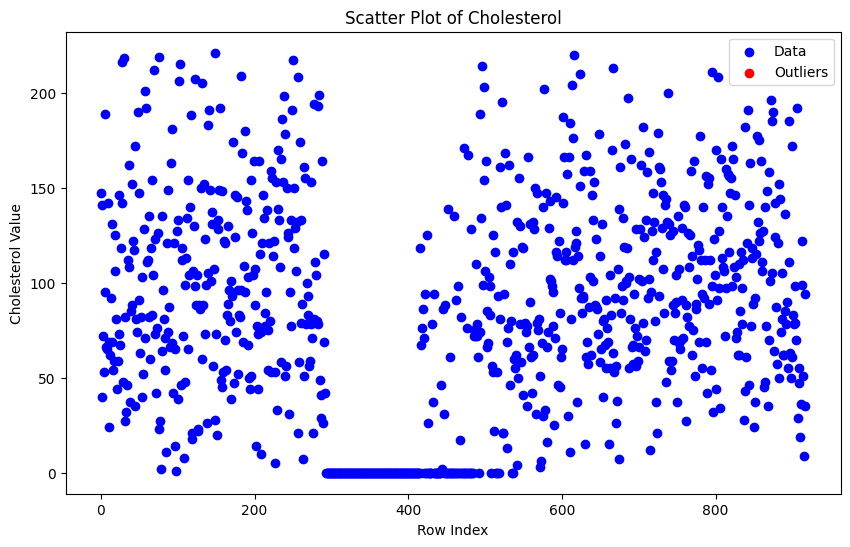

In [69]:
selected_column = 'Cholesterol'  # Replace with the actual column name

# Step 2: Identify Outliers
threshold = 2.5  # You can adjust this threshold based on your dataset and requirements

# Calculate z-scores for the selected column
z_scores = np.abs((df[selected_column] - df[selected_column].mean()) / df[selected_column].std())

# Identify outliers
outliers = z_scores > threshold

# Step 3: Visualize the column with outliers in red
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df[selected_column])), df[selected_column], color='blue', label='Data')
plt.scatter(np.where(outliers), df[selected_column][outliers], color='red', label='Outliers')
plt.xlabel('Row Index')
plt.ylabel(f'{selected_column} Value')
plt.title(f'Scatter Plot of {selected_column}')
plt.legend()
plt.show()
# Assuming you have a pandas DataFrame named df and you've already identified outliers

# Step 4: Remove Outliers
cleaned_df = df[~outliers]

In [61]:
cleaned_df1 = df[~outliers]

In [63]:
cleaned_df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,0.0,2,0
1,21,0,2,55,40,0,1,82,0,1.0,1,1
2,9,1,1,31,141,0,2,25,0,0.0,2,0
3,20,0,0,39,72,0,1,34,1,1.5,1,1
4,26,1,2,49,53,0,1,48,0,0.0,2,0


In [71]:
x_ = df.drop(['HeartDisease'],axis=1)

In [73]:
y_ = df.HeartDisease

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scale = StandardScaler()

In [77]:
x = scale.fit_transform(x_)

In [78]:
x

array([[-1.4331398 ,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.47848359, -1.93816322,  1.27505906, ..., -0.8235563 ,
         0.10566353, -0.59607813],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.81699495, ...,  1.21424608,
         0.29328271, -0.59607813],
       [ 0.37009972, -1.93816322,  0.22903206, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       [-1.64528563,  0.51595242,  1.27505906, ..., -0.8235563 ,
        -0.83243239,  1.05211381]])

In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(.85)
xpca = pca.fit_transform(x)

In [82]:
len(xpca)

918

In [83]:
len(x)

918